<a href="https://colab.research.google.com/github/SuppaBach/2Wats_Prediction/blob/master/2Wats_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Problem 3: The Tale of Two Wat** 

Chulalongkorn University's AI Academy 2020

2nd round screening exam


Candidate name : 
Suppawat Boonrach

*   s.boonrach@outlook.com
*   github.com/suppabach



There are three parts in this program

1.   Preparation
2.   Training
3.   Prediction





# Preparation

How to download and prepare a dataset

Please download this dataset fron this link.

https://drive.google.com/open?id=1Z50scxYHU-Q5-2eptKiKSbLus3dabEsT

Then, upload it to your root folder.

Extract file

In [0]:
import os
import zipfile

local_zip = '/watprakeaw_vs_watpo.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Prepare directory

In [0]:
base_dir = '/tmp/watprakeaw_vs_watpo'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training WatPo pictures
train_WatPo_dir = os.path.join(train_dir, 'WatPo')

# Directory with our training WatPrakeaw pictures
train_WatPrakeaw_dir = os.path.join(train_dir, 'WatPrakeaw')

# Directory with our validation WatPo pictures
validation_WatPo_dir = os.path.join(validation_dir, 'WatPo')

# Directory with our validation WatPrakaew pictures
validation_WatPrakeaw_dir = os.path.join(validation_dir, 'WatPrakeaw')

Check data in directory 

In [5]:
train_WatPo_fnames = os.listdir(train_WatPo_dir)
print(train_WatPo_fnames[:10])

train_WatPrakeaw_fnames = os.listdir(train_WatPrakeaw_dir)
train_WatPrakeaw_fnames.sort()
print(train_WatPrakeaw_fnames[:10])

['po2.png', 'po1.png', 'po3.png', 'po4.png']
['prakeaw1.png', 'prakeaw2.png', 'prakeaw3.png', 'prakeaw4.png']


Check number of data in directory

In [6]:
print('total training WatPo images:', len(os.listdir(train_WatPo_dir)))
print('total training WatPrakeaw images:', len(os.listdir(train_WatPrakeaw_dir)))
print('total validation WatPo images:', len(os.listdir(validation_WatPo_dir)))
print('total validation WatPrakeaw images:', len(os.listdir(validation_WatPrakeaw_dir)))

total training WatPo images: 4
total training WatPrakeaw images: 4
total validation WatPo images: 4
total validation WatPrakeaw images: 4


# Training

In [7]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 50, 50

base_dir = '/tmp/watprakeaw_vs_watpo'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(50,50,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.6))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

EPOCHS = 4
BATCH_SIZE = 1
STEPS_PER_EPOCH = 1
VALIDATION_STEPS = 1

model.fit_generator(
  train_generator,
  steps_per_epoch=STEPS_PER_EPOCH,
  epochs=EPOCHS,
  validation_data=validation_generator,
  validation_steps=VALIDATION_STEPS)

Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Epoch 1/4
1/1 [==============================] - 1s 1s/step - loss: 10.4849 - accuracy: 0.2500 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/4
1/1 [==============================] - 0s 80ms/step - loss: 0.9832 - accuracy: 0.7500 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/4
1/1 [==============================] - 0s 445ms/step - loss: 1.6092 - accuracy: 0.7500 - val_loss: 0.6851 - val_accuracy: 0.7500
Epoch 4/4
1/1 [==============================] - 0s 320ms/step - loss: 6.0210 - accuracy: 0.0000e+00 - val_loss: 0.6963 - val_accuracy: 0.2500


# Prediction

I guess this must be a WatPrakeaw!


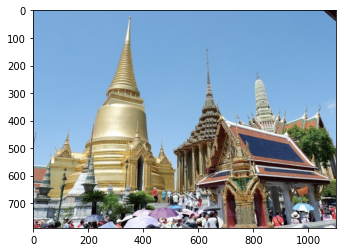

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random

# Let's prepare a random input image of a WatPo or WatPrakeaw from the training set.
WatPo_img_files = [os.path.join(train_WatPo_dir, f) for f in train_WatPo_fnames]
WatPrakeaw_img_files = [os.path.join(train_WatPrakeaw_dir, f) for f in train_WatPrakeaw_fnames]

img_path = random.choice(WatPo_img_files + WatPrakeaw_img_files)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img.squeeze())

img = cv2.imread( img_path, cv2.IMREAD_COLOR )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50,50))
img = img.reshape( (-1, 50, 50, 3) )

result = model.predict(img)

if(result[0][0] == 1):
    print("I guess this must be a WatPo!")
else:
    print("I guess this must be a WatPrakeaw!")